In [2]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\LR-22_04\Arduino_CSV'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Temperature Characterization Testing\LR-22_04
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\LR-22_04\Arduino_CSV\corrected


In [4]:
file_s1_heat ='FGDOS_03F_HIGH_TEMP_CHAR_TEST_Apr_22_18-59-01_s1.csv'
file_s2_heat ='FGDOS_03F_HIGH_TEMP_CHAR_TEST_Apr_22_18-59-01_s2.csv'
print(file_s1_heat)
print(file_s2_heat)
df_s1_heat = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\LR-22_04\Arduino_CSV\corrected'+ '\\'+ file_s1_heat ,encoding='ISO-8859-1')
df_s2_heat = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Temperature Characterization Test\Temp data logging and processing\LR-22_04\Arduino_CSV\corrected'+ '\\'+ file_s2_heat ,encoding='ISO-8859-1')


FGDOS_03F_HIGH_TEMP_CHAR_TEST_Apr_22_18-59-01_s1.csv
FGDOS_03F_HIGH_TEMP_CHAR_TEST_Apr_22_18-59-01_s2.csv


In [5]:
s1_heat = df_s1_heat.to_numpy()
s2_heat = df_s2_heat.to_numpy()
df_s1_heat.head()
df_s2_heat.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby,Hot Junction Temperature (C),Cold Junction Temperature (C),ADC Value
0,0.0000,2,85,164291,75637,0,7.63,h,0,0,22.37,22.5,-6
1,768.7183,2,85,164314,75637,0,7.63,h,0,0,22.37,22.5,-6
2,1541.2290,2,85,164299,75637,0,7.63,h,0,0,22.37,22.5,-6
3,2311.7113,2,85,164321,75645,0,7.63,h,0,0,22.37,22.5,-6
4,3084.0597,2,85,164314,75668,0,7.63,h,0,0,22.37,22.5,-6


In [6]:
df_s1_heat.tail()
df_s2_heat.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby,Hot Junction Temperature (C),Cold Junction Temperature (C),ADC Value
7805,7.317060e+06,2,169,120285,61775,0,7.63,h,0,0,156.06,22.75,9170
7806,7.317836e+06,2,169,120262,61775,0,7.63,h,0,0,156.63,22.50,9210
7807,7.318604e+06,2,169,120224,61759,0,7.63,h,0,0,157.19,22.75,9226
7808,7.319375e+06,2,169,120208,61729,0,7.63,h,0,0,157.63,22.75,9230
7809,7.320143e+06,2,169,120162,61729,0,7.63,h,0,0,157.75,22.75,9226


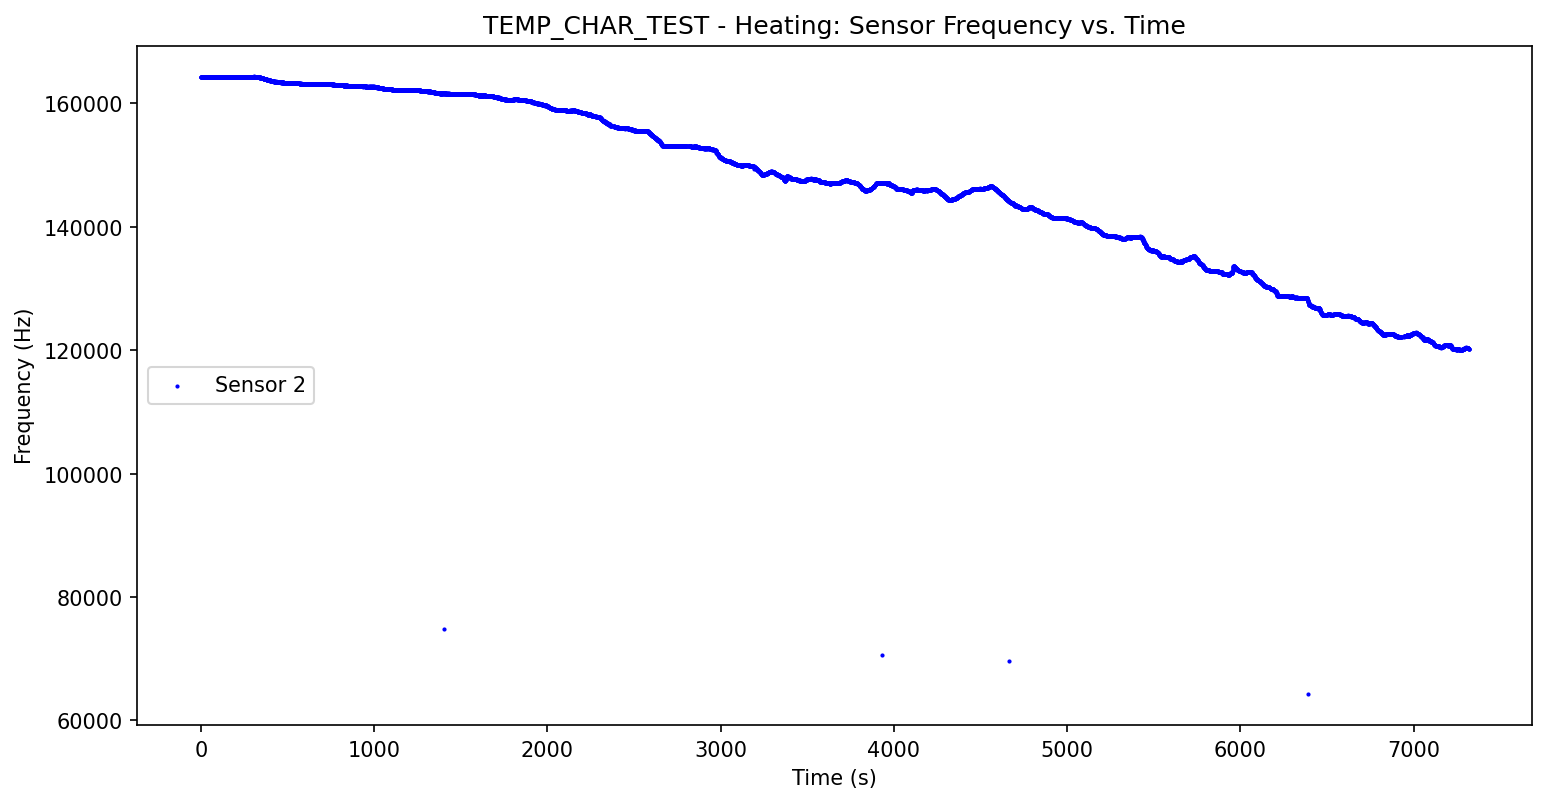

In [7]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
#plt.scatter(s1_heat[:,0], s1_heat[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(2.6e5,3.3e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("TEMP_CHAR_TEST - Heating: Sensor Frequency vs. Time")
plt.show()

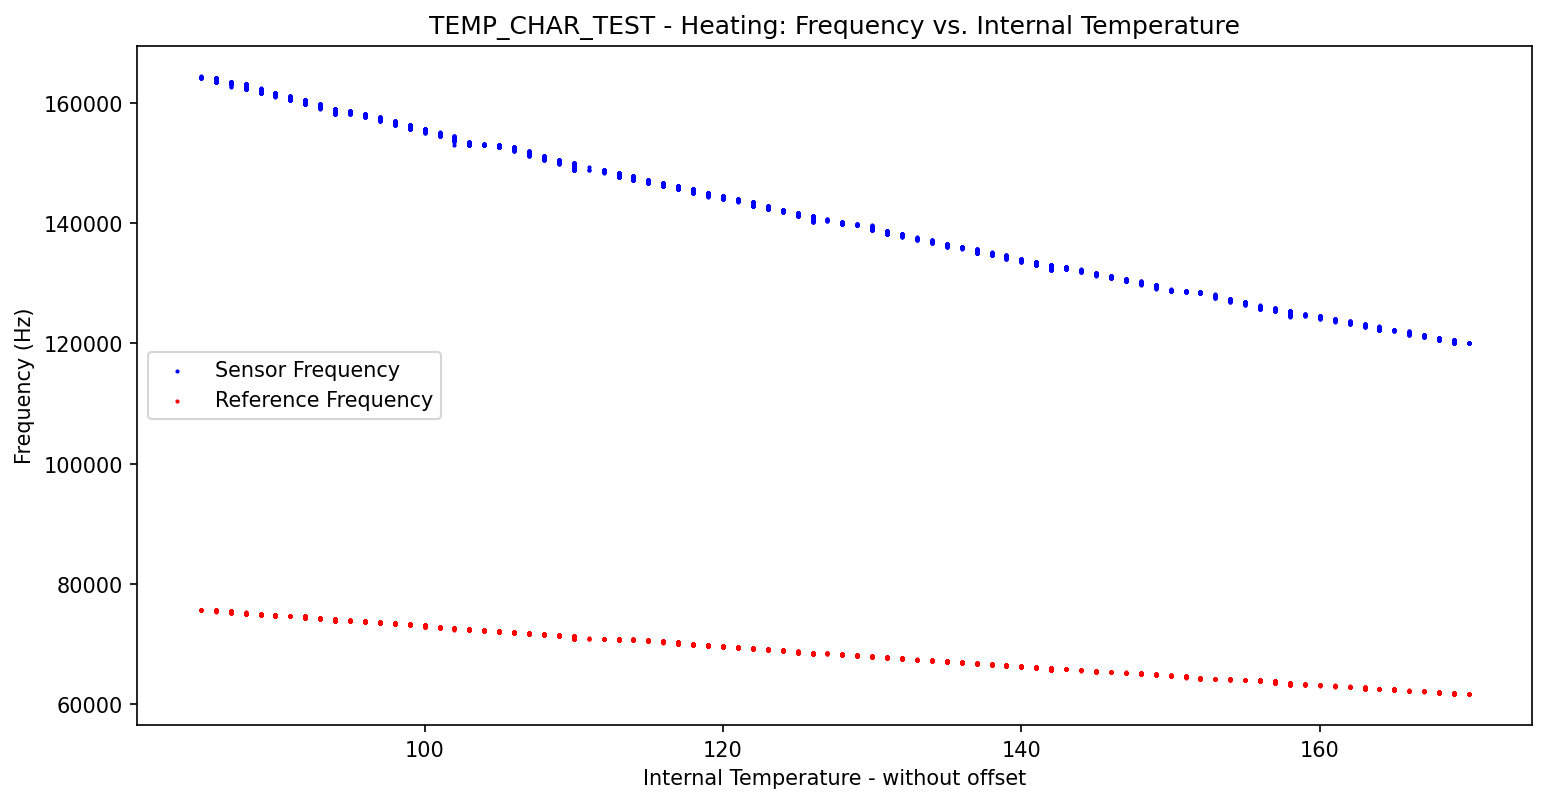

In [14]:
fig_sen_freq_v_internal_temp = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s2_heat[:,2], s2_heat[:,3],s=1, c='b', label = 'Sensor Frequency')
plt.scatter(s2_heat[:,2], s2_heat[:,4],s=1, c='r', label = 'Reference Frequency')

plt.xlabel('Internal Temperature - without offset')
plt.ylabel('Frequency (Hz)')
#plt.xlim(2.6e5,3.3e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("TEMP_CHAR_TEST - Heating: Frequency vs. Internal Temperature")
plt.show()

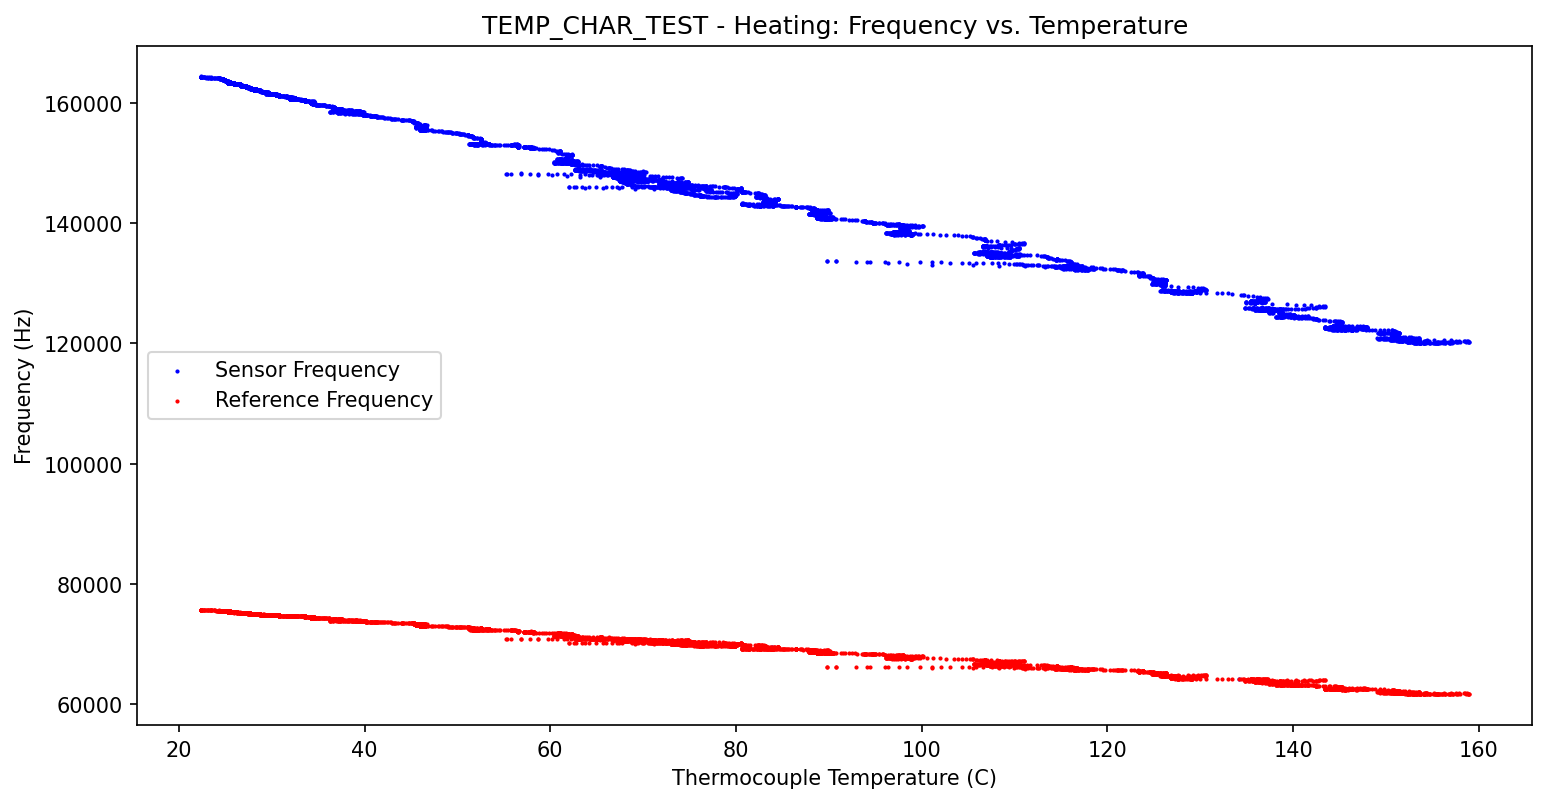

In [15]:
fig_sen_freq_v_tcouple_temp = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s2_heat[:,10], s2_heat[:,3],s=1, c='b', label = 'Sensor Frequency')
plt.scatter(s2_heat[:,10], s2_heat[:,4],s=1, c='r', label = 'Reference Frequency')

plt.xlabel('Thermocouple Temperature (C)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(2.6e5,3.3e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("TEMP_CHAR_TEST - Heating: Frequency vs. Temperature")
plt.show()

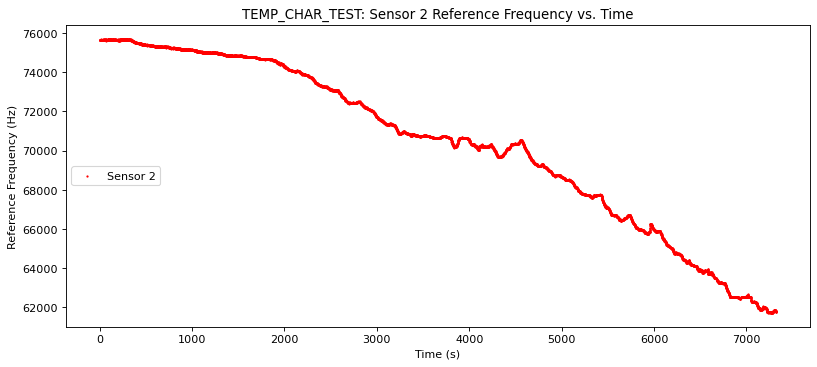

min:  61691
max:  75729
range:  14038
mean:  70324.25160051216
standard deviation:  4213.675577272168


In [7]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,4],s=1, c='r', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("TEMP_CHAR_TEST: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2_heat[:,4].min())
print('max: ',s2_heat[:,4].max())
print('range: ',s2_heat[:,4].max()-s2_heat[:,4].min())
print('mean: ',s2_heat[:,4].mean())
print('standard deviation: ',s2_heat[:,4].std())

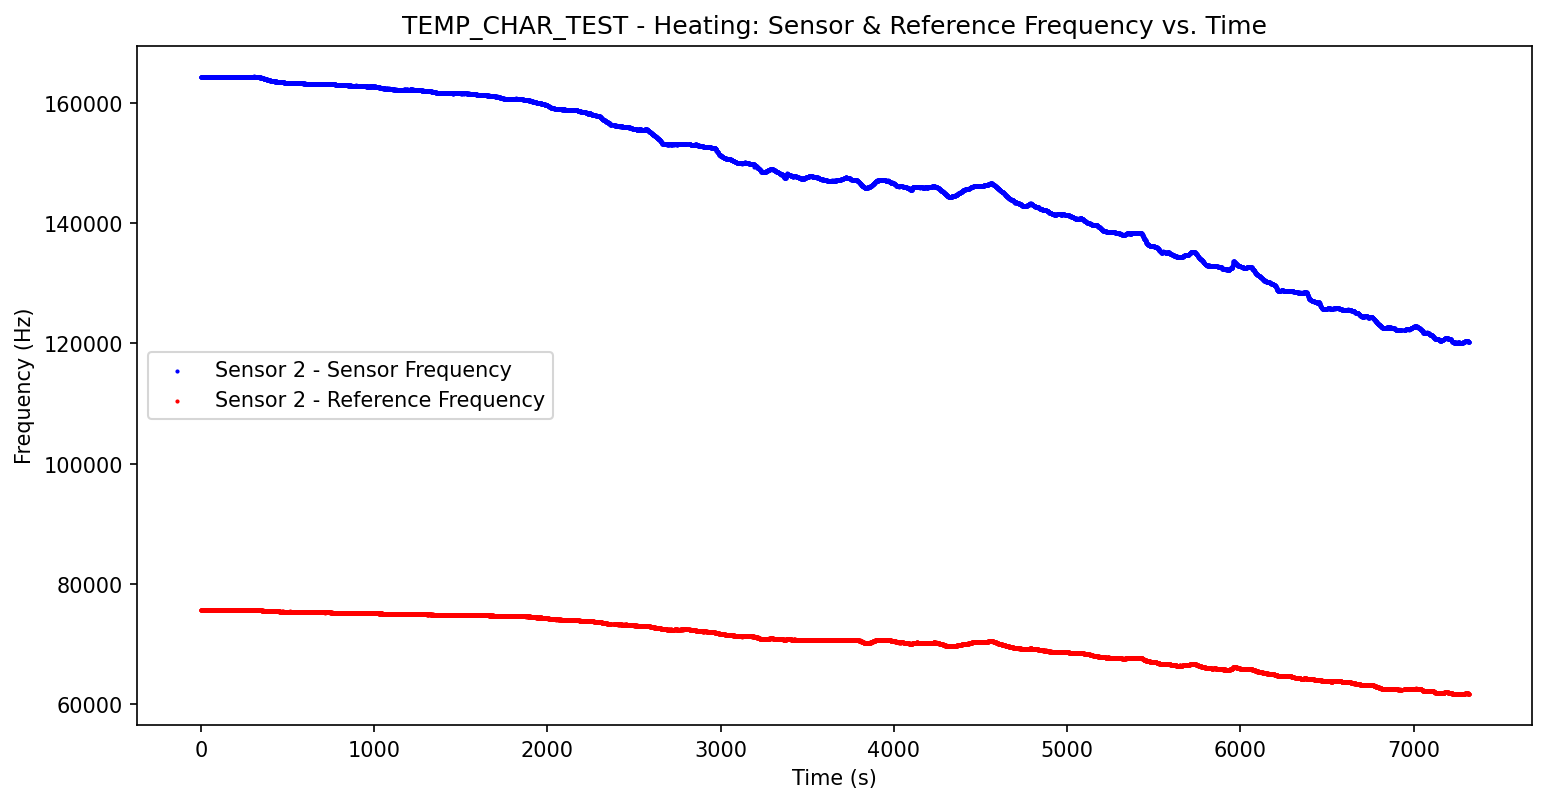

In [8]:
fig_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,3],s=1, c='b', label = 'Sensor 2 - Sensor Frequency')
plt.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,4],s=1, c='r', label = 'Sensor 2 - Reference Frequency')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(2.6e5,3.3e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("TEMP_CHAR_TEST - Heating: Sensor & Reference Frequency vs. Time")
plt.show()

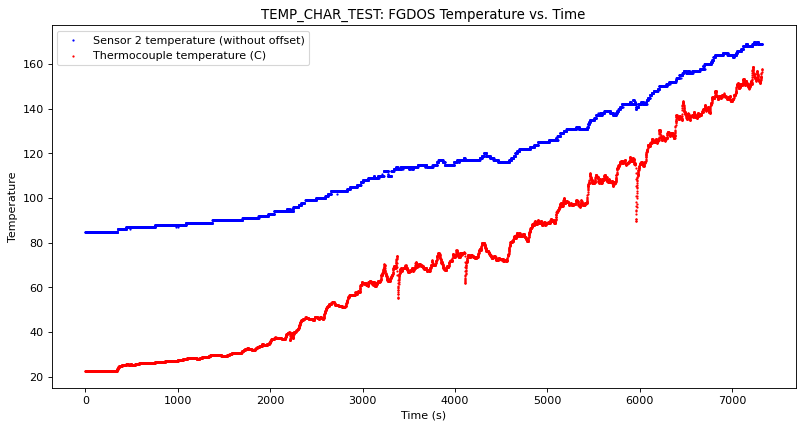

FGDOS Internal Temperature Monitor Stats:
min:  85
max:  170
range:  85
Thermocouple Stats:
min:  22.37
max:  158.94
range:  136.57


In [30]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,2],s=1,c='b',label = 'Sensor 2 temperature (without offset)')
plt.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,10],s=1,c='r',label = 'Thermocouple temperature (C)')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="upper left")
plt.title("TEMP_CHAR_TEST: FGDOS Temperature vs. Time")
plt.show()

print('FGDOS Internal Temperature Monitor Stats:')
print('min: ',s2_heat[:,2].min())
print('max: ',s2_heat[:,2].max())
print('range: ',s2_heat[:,2].max()-s2_heat[:,2].min())

print('Thermocouple Stats:')
print('min: ',s2_heat[:,10].min())
print('max: ',s2_heat[:,10].max())
print('range: ',s2_heat[:,10].max()-s2_heat[:,10].min())

In [36]:
# Sensor 2 - Sensor vs Ref Freq relationship - for temperature compensation

model_s2_heat = LinearRegression()
ref_freq = s2_heat[1:,4].reshape(-1, 1)
sen_freq = s2_heat[1:,3].reshape(-1, 1)
model_s2_heat.fit(ref_freq,sen_freq)
r_sq = model_s2_heat.score(ref_freq,sen_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2_heat.intercept_)
print('slope:', model_s2_heat.coef_)

coefficient of determination: 0.9831344631934082
intercept: [-78061.96666057]
slope: [[3.19706429]]


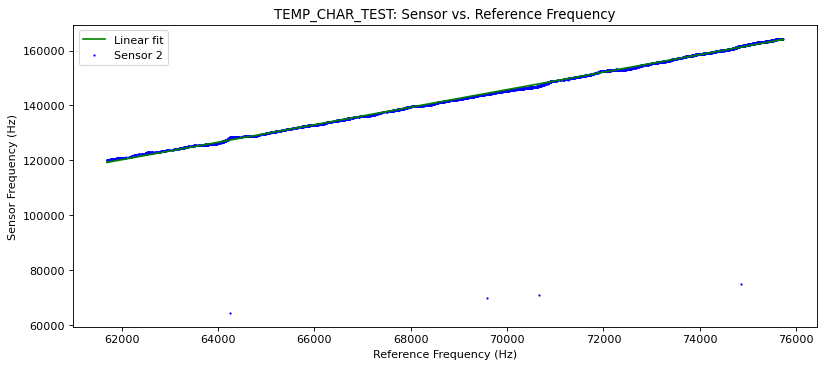

In [38]:
# Sensor V Ref freq plot

fig_sen_v_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2_heat[:,4], s2_heat[:,3],s=1, c='b', label = 'Sensor 2')

# Plot fitted line
sen_freq_comp = ref_freq*(model_s2_heat.coef_) + (model_s2_heat.intercept_)
plt.plot(ref_freq,sen_freq_comp,'g-',label='Linear fit')

plt.xlabel('Reference Frequency (Hz)')
plt.ylabel('Sensor Frequency (Hz)')
plt.legend(loc="upper left")
plt.title("TEMP_CHAR_TEST: Sensor vs. Reference Frequency")
plt.show()

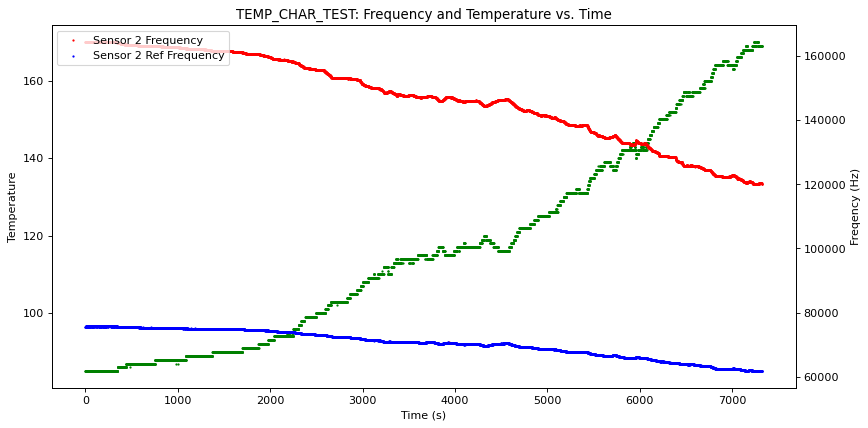

In [52]:
# Temperatures Vs Sensor Frequency Plot (double yy axis)
fig_temp_freq_time = plt.figure(figsize=(12, 6), dpi=80)




ax1 = plt.subplot()
ax1.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,2],s=1,c='g',label = 'Sensor 2 temperature (without offset)')
ax2 = ax1.twinx()
ax2.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,3],s=1, c='r', label = 'Sensor 2 Frequency')
ax2.scatter(s2_heat[:,0]*(1e-3), s2_heat[:,4],s=1, c='b', label = 'Sensor 2 Ref Frequency')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature')
ax2.set_ylabel('Freqency (Hz)')

#plt.ylabel('Temperature')
plt.legend(loc="upper left")
plt.title("TEMP_CHAR_TEST: Frequency and Temperature vs. Time")
plt.show()



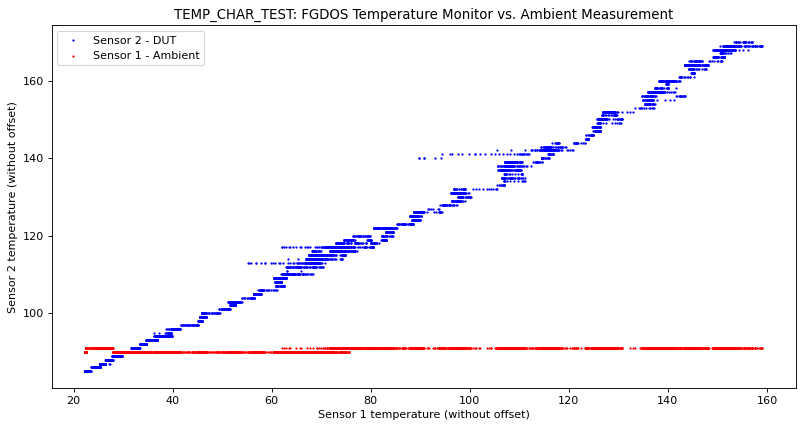

In [16]:
# Thermocouple Vs Internal Temp Monitor plot (with Offset)

fig_temp_fgdos_v_tcouple = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s2_heat[:,10], s2_heat[:,2],s=1,c='b',label = 'Sensor 2 - DUT')
plt.scatter(s1_heat[:,10], s1_heat[:,2],s=1,c='r',label = 'Sensor 1 - Ambient')

plt.xlabel('Sensor 1 temperature (without offset)')
plt.ylabel('Sensor 2 temperature (without offset)')
plt.legend(loc="upper left")
plt.title("TEMP_CHAR_TEST: FGDOS Temperature Monitor vs. Ambient Measurement")
plt.show()